In [53]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [54]:
import json
with open('evaluation_110_dataset.json') as f:
    data = json.load(f)

In [149]:
data

[{'EOGHorizontalSignal_without_AE': {'SVC': {'accuracy': [0.2900552486187845,
     0.23204419889502761],
    'params': {'C': 0.01, 'kernel': 'linear'}},
   'XGBClassifier': {'accuracy': [0.994475138121547, 0.2955801104972376],
    'params': {'max_depth': 2, 'n_estimators': 50}},
   'KNeighborsClassifier': {'accuracy': [0.4419889502762431,
     0.143646408839779],
    'params': {'n_neighbors': 5}},
   'CatBoostClassifier': {'accuracy': [1.0, 0.2541436464088398],
    'params': {'max_depth': 5, 'n_estimators': 100}},
   'RandomForestClassifier': {'accuracy': [1.0, 0.24033149171270718],
    'params': {'max_depth': 35, 'n_estimators': 50}}},
  'EOGHorizontalSignal_with_AE': {'SVC': {'accuracy': [0.5303867403314917,
     0.3011049723756906],
    'params': {'C': 1, 'kernel': 'linear'}},
   'XGBClassifier': {'accuracy': [1.0, 0.2154696132596685],
    'params': {'max_depth': 35, 'n_estimators': 20}},
   'KNeighborsClassifier': {'accuracy': [0.4972375690607735,
     0.2292817679558011],
    'par

In [205]:
#datasets.to_csv("Sharpshooter_results.csv", index_label=False)
datasets = pd.read_csv("Sharpshooter_results.csv")
datasets

,dataset_name,euc_dist_test_acc,euc_dist_train_acc,test_acc,train_acc,Expected_gain,Actual_Gain
0,Two_Patterns,91.0,91.7,46.5,54.6,0.595420,0.510989
1,ChlorineConcentration,65.0,63.4,56.7,61.2,0.965300,0.872308
2,wafer,99.5,99.0,100.0,100.0,1.010101,1.005025
3,MedicalImages,68.4,72.2,53.9,100.0,1.385042,0.788012
4,FaceAll,71.4,88.7,28.9,100.0,1.127396,0.404762
5,OSULeaf,51.7,62.0,54.9,1.0,0.016129,1.061896
6,Adiac,61.1,60.5,35.2,100.0,1.652893,0.576105
7,SwedishLeaf,78.7,75.0,56.3,99.8,1.330667,0.715375
8,yoga,83.0,77.0,61.0,100.0,1.298701,0.734940
9,Fish,78.3,76.0,46.8,100.0,1.315789,0.597701


In [206]:
#name = "Two_Patterns"
#datasets['train_acc'][datasets['dataset_name'] == name] = 54.6
#datasets['test_acc'][datasets['dataset_name'] == name] = 46.5

In [201]:
datasets['Expected_gain']=datasets['train_acc']/datasets['euc_dist_train_acc']
datasets['Actual_Gain']= datasets['test_acc']/datasets['euc_dist_test_acc']

Text(1.45, 0.45, 'FP')

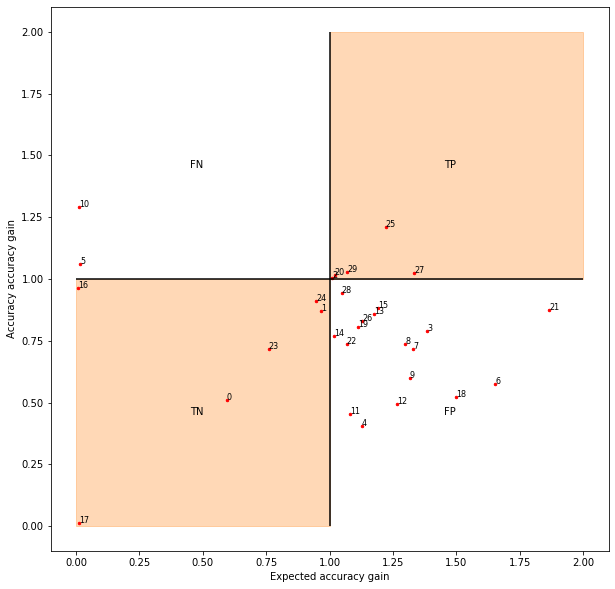

In [204]:
plt.figure(figsize = [10,10])
plt.hlines(1, 0, 2,)
plt.vlines(1, 0, 2,)
plt.xlabel('Expected accuracy gain')
plt.ylabel('Accuracy accuracy gain')
plt.fill_between(x=[0,1], y1=[1,1], y2=0,color='C1',alpha=0.3,)
plt.fill_between(x=[1,2], y1=[2,2], y2=[1,1],color='C1',alpha=0.3,)
plt.scatter(Expected_gain, Actual_Gain, c='red', s=6)
for i,j,k in zip(Expected_gain, Actual_Gain, cnt):
    plt.text(i,j,k, fontsize=8)
plt.text(0.45,0.45,'TN')
plt.text(0.45,1.45,'FN')
plt.text(1.45,1.45,'TP')
plt.text(1.45,0.45,'FP')